In [62]:
# general imports
import pandas as pd

# SDV imports
from sdv.metadata import SingleTableMetadata
from sdv.lite import SingleTablePreset
from tqdm import tqdm

train_data = pd.read_csv('../Dataset/fraud/fraudTrain.csv').iloc[:,1:].sample(n=100000)
test_data = pd.read_csv('../Dataset/fraud/fraudTest.csv').iloc[:,1:]
syn_data = pd.read_csv('../Dataset/fraud/final_syn_data.csv').iloc[:,1:].sample(n=100000)
train_data["cc_num"] = train_data["cc_num"].astype(str)
train_data["zip"] = train_data["zip"].astype(str)
syn_data["cc_num"] = train_data["cc_num"].astype(str)
syn_data["zip"] = train_data["zip"].astype(str)

In [63]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
813309,2019-12-07 16:55:22,4800395067176717,"fraud_Hahn, Bahringer and McLaughlin",personal_care,26.10,Daniel,Owens,M,88794 Mandy Lodge Apt. 874,Howells,...,41.6964,-96.9858,1063,Research scientist (maths),1928-04-02,f0e3a649b472132eddfbdea65ff4adfb,1354899322,41.530940,-97.727837,0
1009165,2020-02-19 09:54:35,676292294938,fraud_Herzog Ltd,misc_pos,9.47,Lisa,Fitzpatrick,F,58761 Brewer Rapids,Skytop,...,41.2336,-75.2389,104,Financial trader,1927-08-25,6b2d983b06eb2bc692dab0176ec316cb,1361267675,40.375070,-74.325482,0
878340,2019-12-22 00:12:24,213186551511454,"fraud_Daugherty, Pouros and Beahan",shopping_pos,1.59,Cody,Dean,M,737 Thomas Wall Apt. 502,West Bethel,...,44.4020,-70.8601,47,Chief Operating Officer,1951-03-31,2e57cae1ea678781feab34642de0281e,1356135144,44.950271,-71.682210,0
839858,2019-12-13 14:58:09,573860193545,fraud_Dibbert-Green,entertainment,60.92,Cristian,Jones,M,0423 Kirby Field Suite 623,Wilmette,...,42.0765,-87.7246,27020,Trade mark attorney,1986-07-23,f89ebf5d2d0021b6b8cf3dd6634abb5b,1355410689,41.656770,-87.012084,0
352937,2019-06-14 20:33:25,342952484382519,fraud_O'Connell-Ullrich,home,115.12,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,42.0158,-73.2913,647,Comptroller,1987-09-26,fe83408337cbc9c5365ceff594da460f,1339706005,41.903059,-72.794410,0


In [64]:
syn_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1116634,2019-07-16 17:30:56,NaN,"fraud_Dare, Fritsch and Zboncak",misc_pos,70.505790,Jessica,Quinn,M,649 Holly Meadows Apt. 946,Latashaland,...,-55.501909,-111.003818,407747,Systems analyst,1983-11-16,AHwxm,1342494065,-55.501909,-111.003818,0
78265,2020-07-29 12:44:24,NaN,fraud_Kilback and Sons,food_dining,1.000000,David,Martinez,M,8196 Oneill Road,North Sherylstad,...,18.035500,36.070999,349764,Energy engineer,1963-05-06,AAcxF,1371816817,18.035500,36.070999,0
1415210,2019-07-02 07:45:09,NaN,"fraud_Hettinger, McCullough and Fay",shopping_pos,16.160085,Jeremy,Perez,M,89697 Fisher Junction,Markstad,...,-50.678639,-101.357278,461343,Investment analyst,1991-12-27,AKDTe,1341180038,-50.678639,-101.357278,0
775865,2019-05-27 16:15:39,NaN,fraud_Wuckert-Goldner,kids_pets,1.000000,John,Sanchez,F,4267 Mclaughlin Rue,North Michelleview,...,-62.347290,-124.694579,562545,Software engineer,1953-06-11,AFawZ,1338108703,-62.347290,-124.694579,0
725530,2020-04-12 18:14:01,NaN,fraud_Yost-Rogahn,shopping_net,244.412734,Charles,Jones,F,31413 John Port Apt. 135,Espinozaview,...,-58.786714,-117.573428,557490,Research scientist (medical),1959-06-10,AFIQa,1365840241,-58.786714,-117.573428,0


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_dataset(dataset):
    # Calculate summary statistics for each feature
    summary = dataset.describe(include='all')
    summary.loc['dtype'] = dataset.dtypes
    summary.loc['missing'] = dataset.isna().sum()
    
    # Calculate correlation coefficients between features
    corr = dataset.corr()

    # Plot a heatmap of the correlation coefficients
    sns.heatmap(corr, annot=True, cmap='coolwarm')

    # Show the summary statistics and correlation heatmap
    plt.show()
    
    return summary,corr



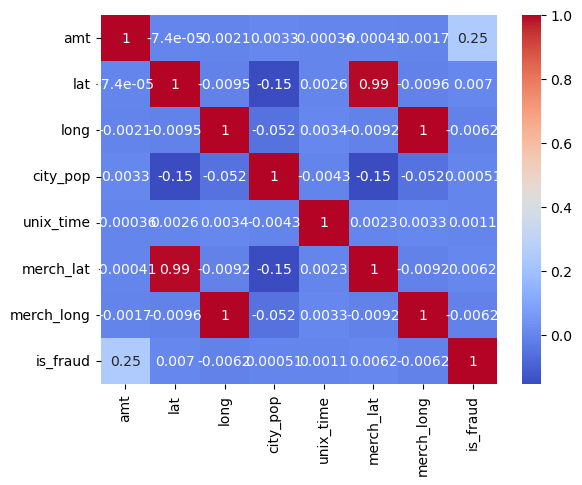

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,100000,100000,100000,100000,100000.0,100000,100000,100000,100000,100000,...,100000.0,100000.0,100000.0,100000,100000,100000,100000.0,100000.0,100000.0,100000.0
unique,99859,953,693,14,NaN,347,477,2,953,870,...,NaN,NaN,NaN,489,939,100000,NaN,NaN,NaN,NaN
top,2020-05-04 14:37:07,4716561796955522,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,11014 Chad Lake Apt. 573,Birmingham,...,NaN,NaN,NaN,Film/video editor,1977-03-23,f0e3a649b472132eddfbdea65ff4adfb,NaN,NaN,NaN,NaN
freq,2,274,323,10049,NaN,1986,2307,54554,274,463,...,NaN,NaN,NaN,786,426,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,70.012865,NaN,NaN,NaN,NaN,NaN,...,38.538058,-90.224188,87894.78502,NaN,NaN,NaN,1349167414.27292,38.538673,-90.227132,0.00591
std,NaN,NaN,NaN,NaN,143.043375,NaN,NaN,NaN,NaN,NaN,...,5.06045,13.738651,299579.917175,NaN,NaN,NaN,12868726.294055,5.097576,13.751773,0.076649
min,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,20.0271,-165.6723,23.0,NaN,NaN,NaN,1325376383.0,19.046916,-166.670132,0.0
25%,NaN,NaN,NaN,NaN,9.67,NaN,NaN,NaN,NaN,NaN,...,34.6689,-96.8094,741.0,NaN,NaN,NaN,1338670723.25,34.758039,-96.924805,0.0
50%,NaN,NaN,NaN,NaN,47.51,NaN,NaN,NaN,NaN,NaN,...,39.3543,-87.4769,2443.0,NaN,NaN,NaN,1349105905.0,39.37003,-87.441368,0.0
75%,NaN,NaN,NaN,NaN,83.18,NaN,NaN,NaN,NaN,NaN,...,41.8948,-80.158,20328.0,NaN,NaN,NaN,1359286039.75,41.951784,-80.225446,0.0


In [66]:
sum_train = analyze_dataset(train_data)
sum_train[0]

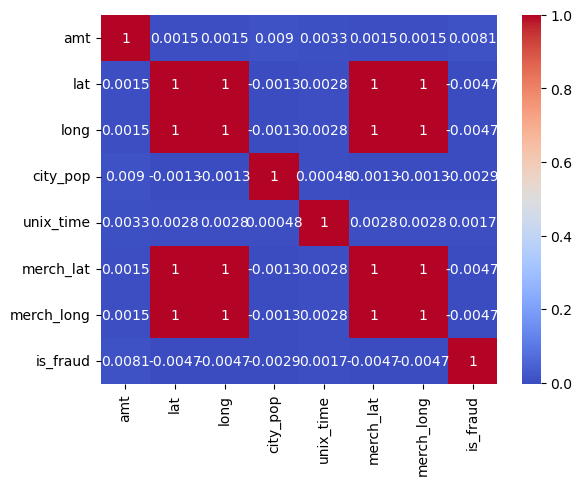

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,100000,5416,100000,100000,100000.0,100000,100000,100000,100000,100000,...,100000.0,100000.0,100000.0,100000,100000,100000,100000.0,100000.0,100000.0,100000.0
unique,99874,872,693,14,NaN,690,1000,2,99999,38068,...,NaN,NaN,NaN,639,26938,100000,NaN,NaN,NaN,NaN
top,2020-04-11 21:27:25,4587657402165341815,fraud_Kilback LLC,kids_pets,NaN,Michael,Smith,F,572 Timothy Mews,Port Michael,...,NaN,NaN,NaN,Therapeutic radiographer,1970-10-24,AHwxm,NaN,NaN,NaN,NaN
freq,2,24,4255,11740,NaN,2299,2133,56992,2,94,...,NaN,NaN,NaN,195,19,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,105.801684,NaN,NaN,NaN,NaN,NaN,...,0.042949,0.085898,170005.63173,NaN,NaN,NaN,1349185850.41309,0.042949,0.085898,0.00157
std,NaN,NaN,NaN,NaN,116.050015,NaN,NaN,NaN,NaN,NaN,...,51.93665,103.8733,205859.310607,NaN,NaN,NaN,12040539.803818,51.93665,103.8733,0.039592
min,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,-89.99995,-179.9999,23.0,NaN,NaN,NaN,1325376018.0,-89.99995,-179.9999,0.0
25%,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,-44.743783,-89.487565,23.0,NaN,NaN,NaN,1340544451.25,-44.743783,-89.487565,0.0
50%,NaN,NaN,NaN,NaN,71.244046,NaN,NaN,NaN,NaN,NaN,...,-0.103943,-0.207887,89129.5,NaN,NaN,NaN,1349210707.0,-0.103943,-0.207887,0.0
75%,NaN,NaN,NaN,NaN,178.945368,NaN,NaN,NaN,NaN,NaN,...,44.966813,89.933626,291255.25,NaN,NaN,NaN,1357871632.0,44.966813,89.933626,0.0


In [67]:
sum_syn = analyze_dataset(syn_data)
sum_syn[0]

In [68]:
mean_corr_error = abs(np.mean(np.mean(sum_train[1]-sum_syn[1])))
mean_corr_error

D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.13169253120995997

In [69]:
sum_train[0].columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [70]:
numerical_cols = list(train_data.select_dtypes(include=['int64', 'float64']).columns)
categorical_cols = list(train_data.select_dtypes(include=['object', 'category']).columns)

In [71]:
numerical_cols

['amt',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [72]:
categorical_cols

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'job',
 'dob',
 'trans_num']

In [73]:
sum_train[0][numerical_cols]

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,70.012865,38.538058,-90.224188,87894.78502,1349167414.27292,38.538673,-90.227132,0.00591
std,143.043375,5.06045,13.738651,299579.917175,12868726.294055,5.097576,13.751773,0.076649
min,1.0,20.0271,-165.6723,23.0,1325376383.0,19.046916,-166.670132,0.0
25%,9.67,34.6689,-96.8094,741.0,1338670723.25,34.758039,-96.924805,0.0
50%,47.51,39.3543,-87.4769,2443.0,1349105905.0,39.37003,-87.441368,0.0
75%,83.18,41.8948,-80.158,20328.0,1359286039.75,41.951784,-80.225446,0.0


In [75]:
sum_syn[0][numerical_cols]

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,105.801684,0.042949,0.085898,170005.63173,1349185850.41309,0.042949,0.085898,0.00157
std,116.050015,51.93665,103.8733,205859.310607,12040539.803818,51.93665,103.8733,0.039592
min,1.0,-89.99995,-179.9999,23.0,1325376018.0,-89.99995,-179.9999,0.0
25%,1.0,-44.743783,-89.487565,23.0,1340544451.25,-44.743783,-89.487565,0.0
50%,71.244046,-0.103943,-0.207887,89129.5,1349210707.0,-0.103943,-0.207887,0.0
75%,178.945368,44.966813,89.933626,291255.25,1357871632.0,44.966813,89.933626,0.0


In [78]:
from scipy.stats import ks_2samp

def calculate_ks(col_data1, col_data2):
    ks_stat, p_value = ks_2samp(col_data1, col_data2)
    return ks_stat

# Assuming df1 and df2 have the same column names
ks_dict = {}

df1 = train_data[numerical_cols]
df2 = syn_data[numerical_cols]


for col in df1.columns:
    col_data1 = df1[col].values
    col_data2 = df2[col].values
    
    # Calculate KS for the column
    ks_stat = calculate_ks(col_data1, col_data2)
    
    # Store the KS value in a dictionary
    ks_dict[col] = ks_stat

# Convert the dictionary to a DataFrame for easier viewing
ks_df = pd.DataFrame.from_dict(ks_dict, orient='index', columns=['KS'])
ks_df

,KS
amt,0.33269
lat,0.64071
long,0.69062
city_pop,0.38253
unix_time,0.05237
merch_lat,0.63678
merch_long,0.68938
is_fraud,0.00434


In [79]:
from scipy.stats import entropy

def calculate_kl(col_data1, col_data2):
    """
    Calculates the KL divergence for two numpy arrays representing two datasets.
    """
    kl_div = entropy(col_data1, col_data2)
    return kl_div

# Assuming df1 and df2 have the same column names
kl_dict = {}

df1 = train_data[numerical_cols]
df2 = syn_data[numerical_cols]

for col in df1.columns:
    # Get column data from both datasets
    col_data1 = df1[col].values
    col_data2 = df2[col].values
    
    # Calculate KL divergence for the column
    kl_div = calculate_kl(col_data1, col_data2)
    
    # Store the KL divergence value in a dictionary
    kl_dict[col] = kl_div

# Convert the dictionary to a DataFrame for easier viewing
kl_df = pd.DataFrame.from_dict(kl_dict, orient='index', columns=['KL Divergence'])
kl_df

,KL Divergence
amt,2.236023
lat,inf
long,inf
city_pop,5.376041
unix_time,0.000086
merch_lat,inf
merch_long,inf
is_fraud,inf


In [74]:
sum_train[0][categorical_cols]

,trans_date_trans_time,cc_num,merchant,category,first,last,gender,street,city,state,zip,job,dob,trans_num
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,99859,953,693,14,347,477,2,953,870,50,940,489,939,100000
top,2020-05-04 14:37:07,4716561796955522,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,11014 Chad Lake Apt. 573,Birmingham,TX,34112,Film/video editor,1977-03-23,f0e3a649b472132eddfbdea65ff4adfb
freq,2,274,323,10049,1986,2307,54554,274,463,7401,285,786,426,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
sum_syn[0][categorical_cols]

,trans_date_trans_time,cc_num,merchant,category,first,last,gender,street,city,state,zip,job,dob,trans_num
count,100000,5416,100000,100000,100000,100000,100000,100000,100000,100000,5416,100000,100000,100000
unique,99874,872,693,14,690,1000,2,99999,38068,51,861,639,26938,100000
top,2020-04-11 21:27:25,4587657402165341815,fraud_Kilback LLC,kids_pets,Michael,Smith,F,572 Timothy Mews,Port Michael,TX,60958,Therapeutic radiographer,1970-10-24,AHwxm
freq,2,24,4255,11740,2299,2133,56992,2,94,7005,24,195,19,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
def calculate_jaccard_similarity(col_data1, col_data2):
    """
    Calculates the Jaccard similarity index for two numpy arrays representing two categorical datasets.
    """
    # Find the intersection and union of the two sets
    intersection = set(col_data1).intersection(set(col_data2))
    union = set(col_data1).union(set(col_data2))
    
    # Calculate the Jaccard similarity index
    jaccard_sim = len(intersection) / len(union)
    
    return jaccard_sim

# Assuming df1 and df2 have the same column names
jaccard_dict = {}

df1 = train_data[categorical_cols]
df2 = syn_data[categorical_cols]

for col in df1.columns:
    # Get column data from both datasets
    col_data1 = df1[col].values
    col_data2 = df2[col].values
    
    # Calculate Jaccard similarity index for the column
    jaccard_sim = calculate_jaccard_similarity(col_data1, col_data2)
    
    # Store the Jaccard similarity index value in a dictionary
    jaccard_dict[col] = jaccard_sim

# Convert the dictionary to a DataFrame for easier viewing
jaccard_df = pd.DataFrame.from_dict(jaccard_dict, orient='index', columns=['Jaccard Similarity'])
jaccard_df

,Jaccard Similarity
trans_date_trans_time,0.001042
cc_num,0.914046
merchant,1.000000
category,1.000000
first,0.502899
last,0.477000
gender,1.000000
street,0.000000
city,0.000591
state,0.980392


In [ ]:

from scipy.spatial.distance import braycurtis

# Assuming df1 and df2 have the same column names
bray_curtis_dict = {}

for col in df1.columns:
    # Get column data from both datasets
    col_data1 = df1[col].value_counts(normalize=True).sort_index()
    col_data2 = df2[col].value_counts(normalize=True).sort_index()
    
    # Calculate Bray-Curtis dissimilarity for the column
    bray_curtis_dist = braycurtis(col_data1, col_data2)
    
    # Store the Bray-Curtis dissimilarity value in a dictionary
    bray_curtis_dict[col] = bray_curtis_dist

# Convert the dictionary to a DataFrame for easier viewing
bray_curtis_df = pd.DataFrame.from_dict(bray_curtis_dict, orient='index', columns=['Bray-Curtis Dissimilarity'])
